<h1> STEP 1: Import libraries and load data

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your CSV file
df = pd.read_csv('C:/Users/anasl/Desktop/Daten 1/Daten/Output Data/Weather_Master_Data.csv')  # Change to your file path
print(f"Data loaded: {len(df)} rows")

Data loaded: 269160 rows


<h1> STEP 2: Show available stations

In [ ]:
stations = df['Standort'].unique()
print(f"Available stations ({len(stations)}):")
for i, station in enumerate(stations):
    print(f"{i+1:3d}. {station}")

Available stations (214):
  1. Aachen-Orsbach
  2. Ahaus
  3. Alfeld
  4. Andernach
  5. Angermünde
  6. Arkona
  7. Artern
  8. Augsburg
  9. Balingen-Bronnhaupten
 10. Bamberg
 11. Barth
 12. Baruth
 13. Belm
 14. Berge
 15. Berlin Brandenburg
 16. Berlin-Dahlem (FU)
 17. Berlin-Tegel
 18. Berlin-Tempelhof
 19. Bertsdorf-Hörnitz
 20. Berus
 21. Boizenburg
 22. Boltenhagen
 23. Braunlage
 24. Braunschweig
 25. Bremen
 26. Bremerhaven
 27. Bremervörde
 28. Brocken
 29. Carlsfeld
 30. Chemnitz
 31. Chieming
 32. Cottbus
 33. Cuxhaven
 34. Deuselbach
 35. Diepholz
 36. Doberlug-Kirchhain
 37. Dresden-Klotzsche
 38. Dörnick
 39. Dörpen
 40. Düsseldorf
 41. Eisenach
 42. Elpersbüttel
 43. Emden
 44. Erfurt-Weimar
 45. Essen-Bredeney
 46. Faßberg
 47. Fehmarn
 48. Feldberg/Mecklenburg
 49. Feldberg/Schwarzwald
 50. Feuchtwangen-Heilbronn
 51. Fichtelberg
 52. Fichtelberg/Oberfranken-Hüttstadl
 53. Frankfurt/Main
 54. Freiburg
 55. Freudenstadt
 56. Friesoythe-Altenoythe
 57. Fürstenzell
 58

<h1> STEP 3: Select station and process data

In [37]:
# Replace with actual station name

selected_station = 'Zwiesel'  

# Filter and process data
station_data = df[df['Standort'] == selected_station].copy()
station_data['Datum'] = pd.to_datetime(station_data['Datum'], format='%d/%m/%Y')
station_data['YearMonth'] = station_data['Datum'].dt.to_period('M')

# Calculate monthly averages
monthly_data = station_data.groupby('YearMonth').agg({
    'MinTemp': 'mean',
    'AvgTemp': 'mean', 
    'MaxTemp': 'mean'
}).reset_index()

monthly_data['Date'] = monthly_data['YearMonth'].dt.to_timestamp()
print(f"Processing complete: {len(monthly_data)} months of data")

Processing complete: 64 months of data


<h1> # STEP 4: Create chart

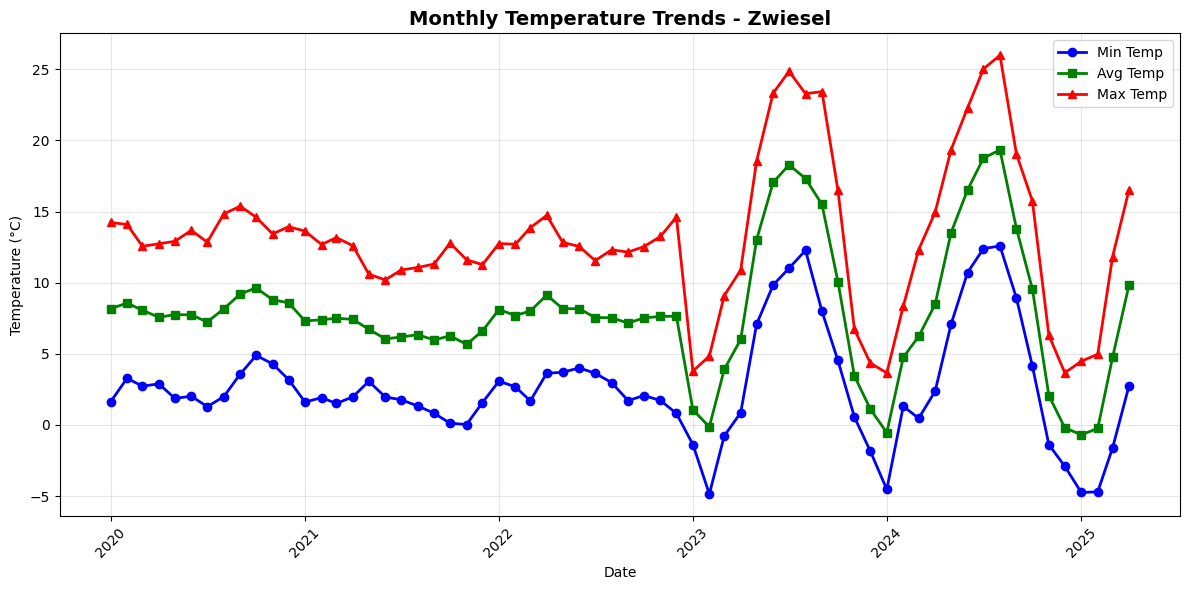

In [38]:
plt.figure(figsize=(12, 6))

# Plot temperature lines
plt.plot(monthly_data['Date'], monthly_data['MinTemp'], 'b-o', label='Min Temp', linewidth=2)
plt.plot(monthly_data['Date'], monthly_data['AvgTemp'], 'g-s', label='Avg Temp', linewidth=2)
plt.plot(monthly_data['Date'], monthly_data['MaxTemp'], 'r-^', label='Max Temp', linewidth=2)

# Format chart
plt.title(f'Monthly Temperature Trends - {selected_station}', fontsize=14, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()